# DBSCAN Clustering on Crime data

In [23]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#load the dataset

In [4]:
df=pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
df.drop(df.columns[0], axis=1,inplace=True)
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


# EDA

In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
df.duplicated().sum()

0

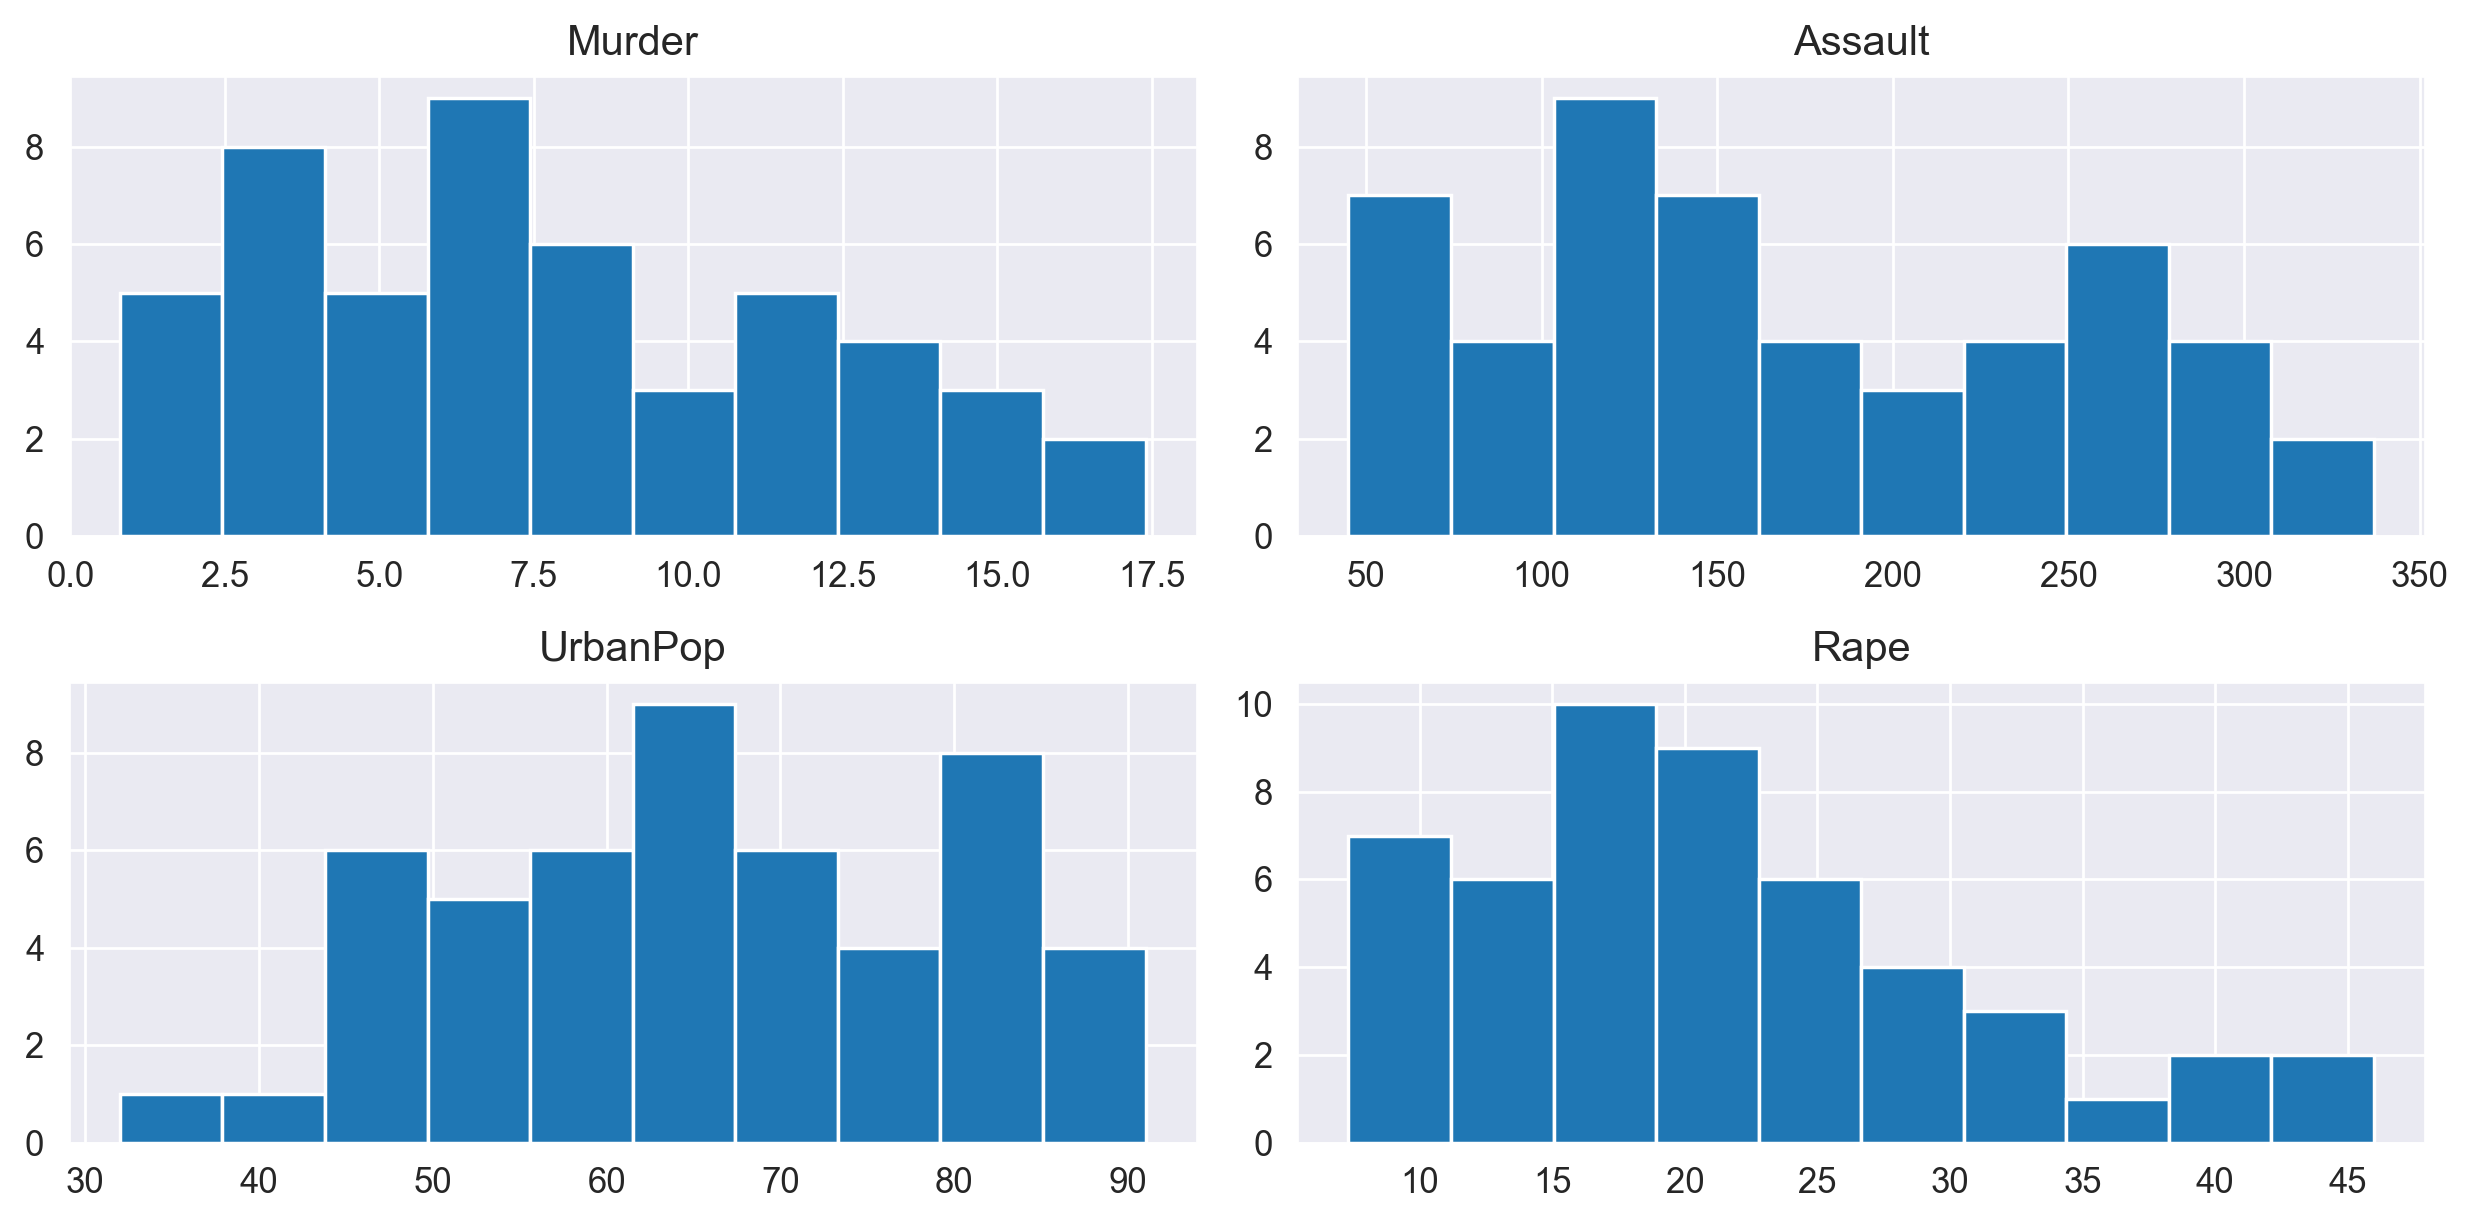

In [9]:
df.hist()
plt.tight_layout()

<Axes: xlabel='Murder'>

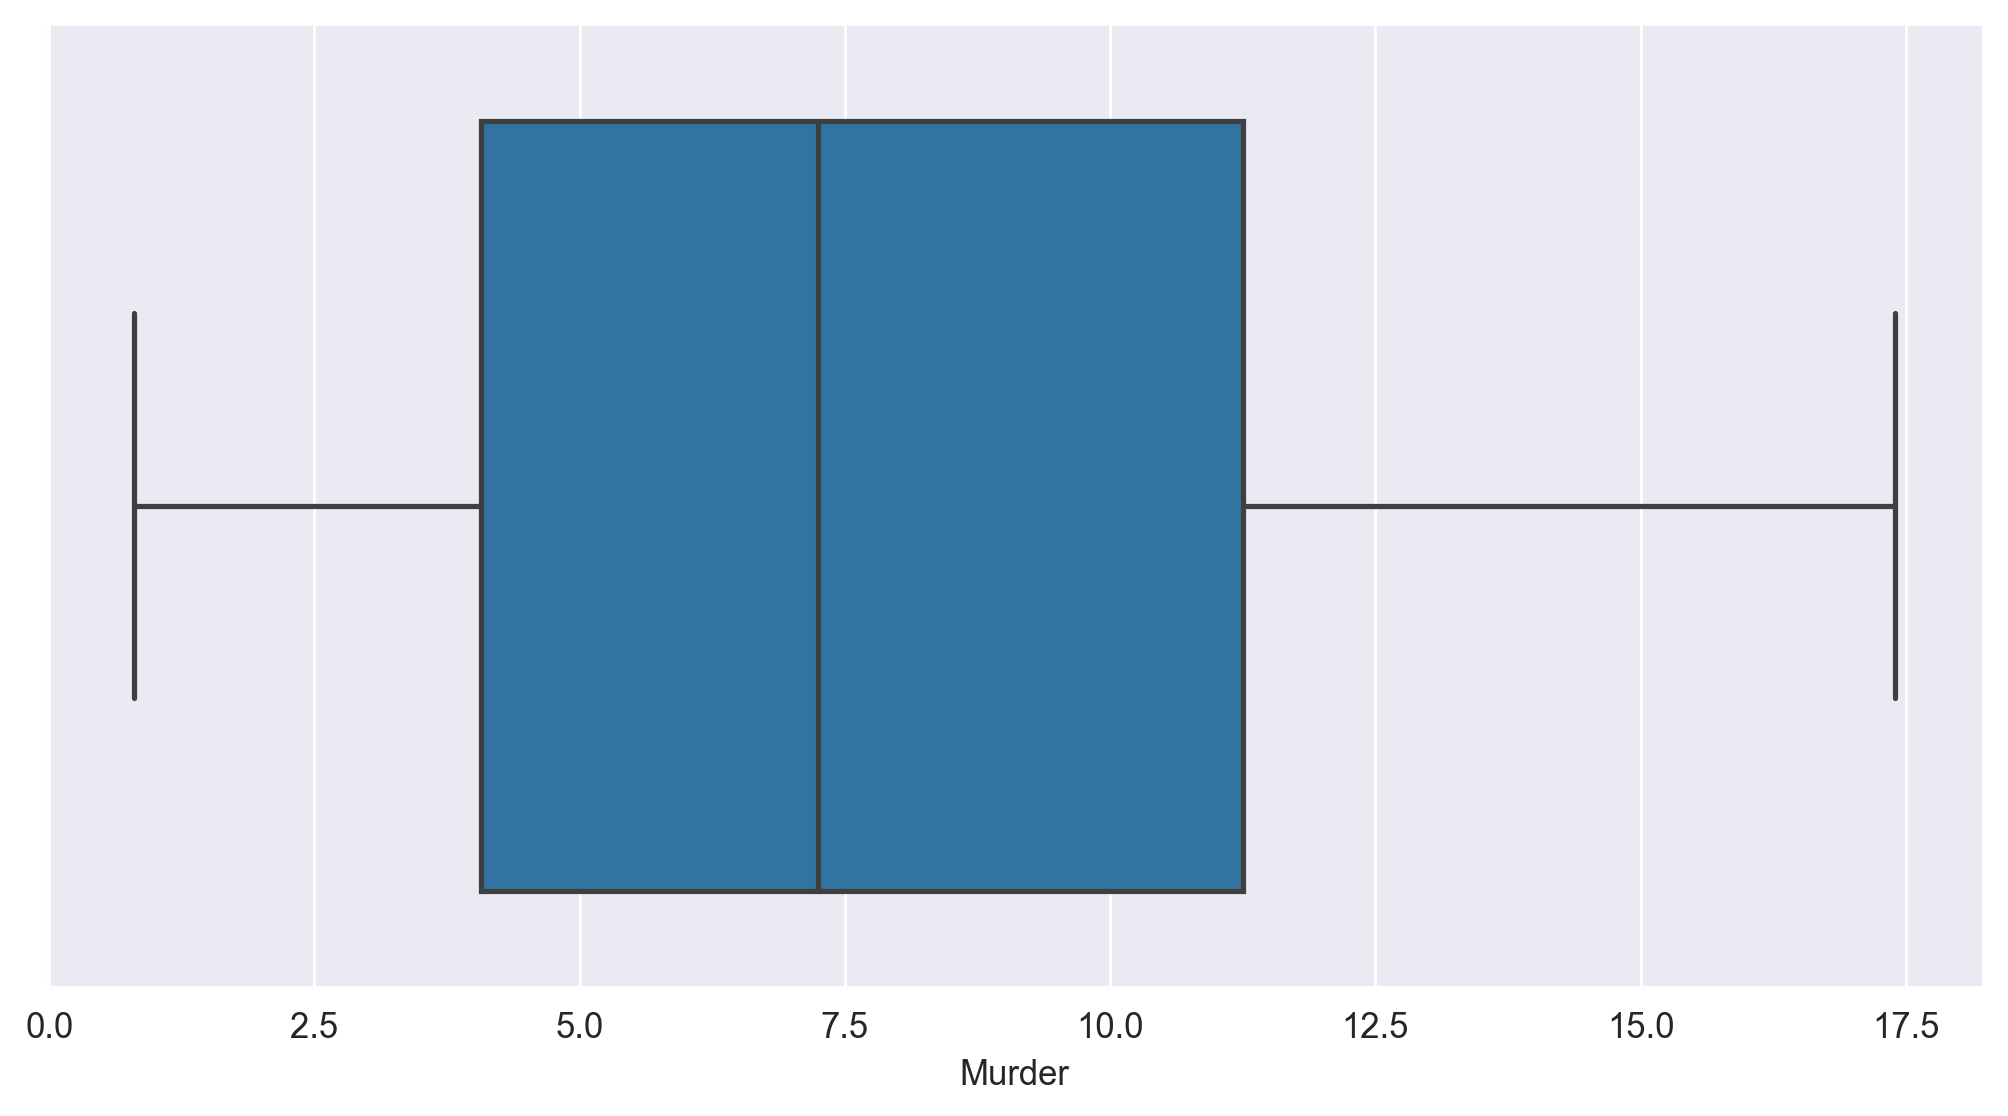

In [10]:
sns.boxplot(x=df['Murder'])

<Axes: xlabel='Assault'>

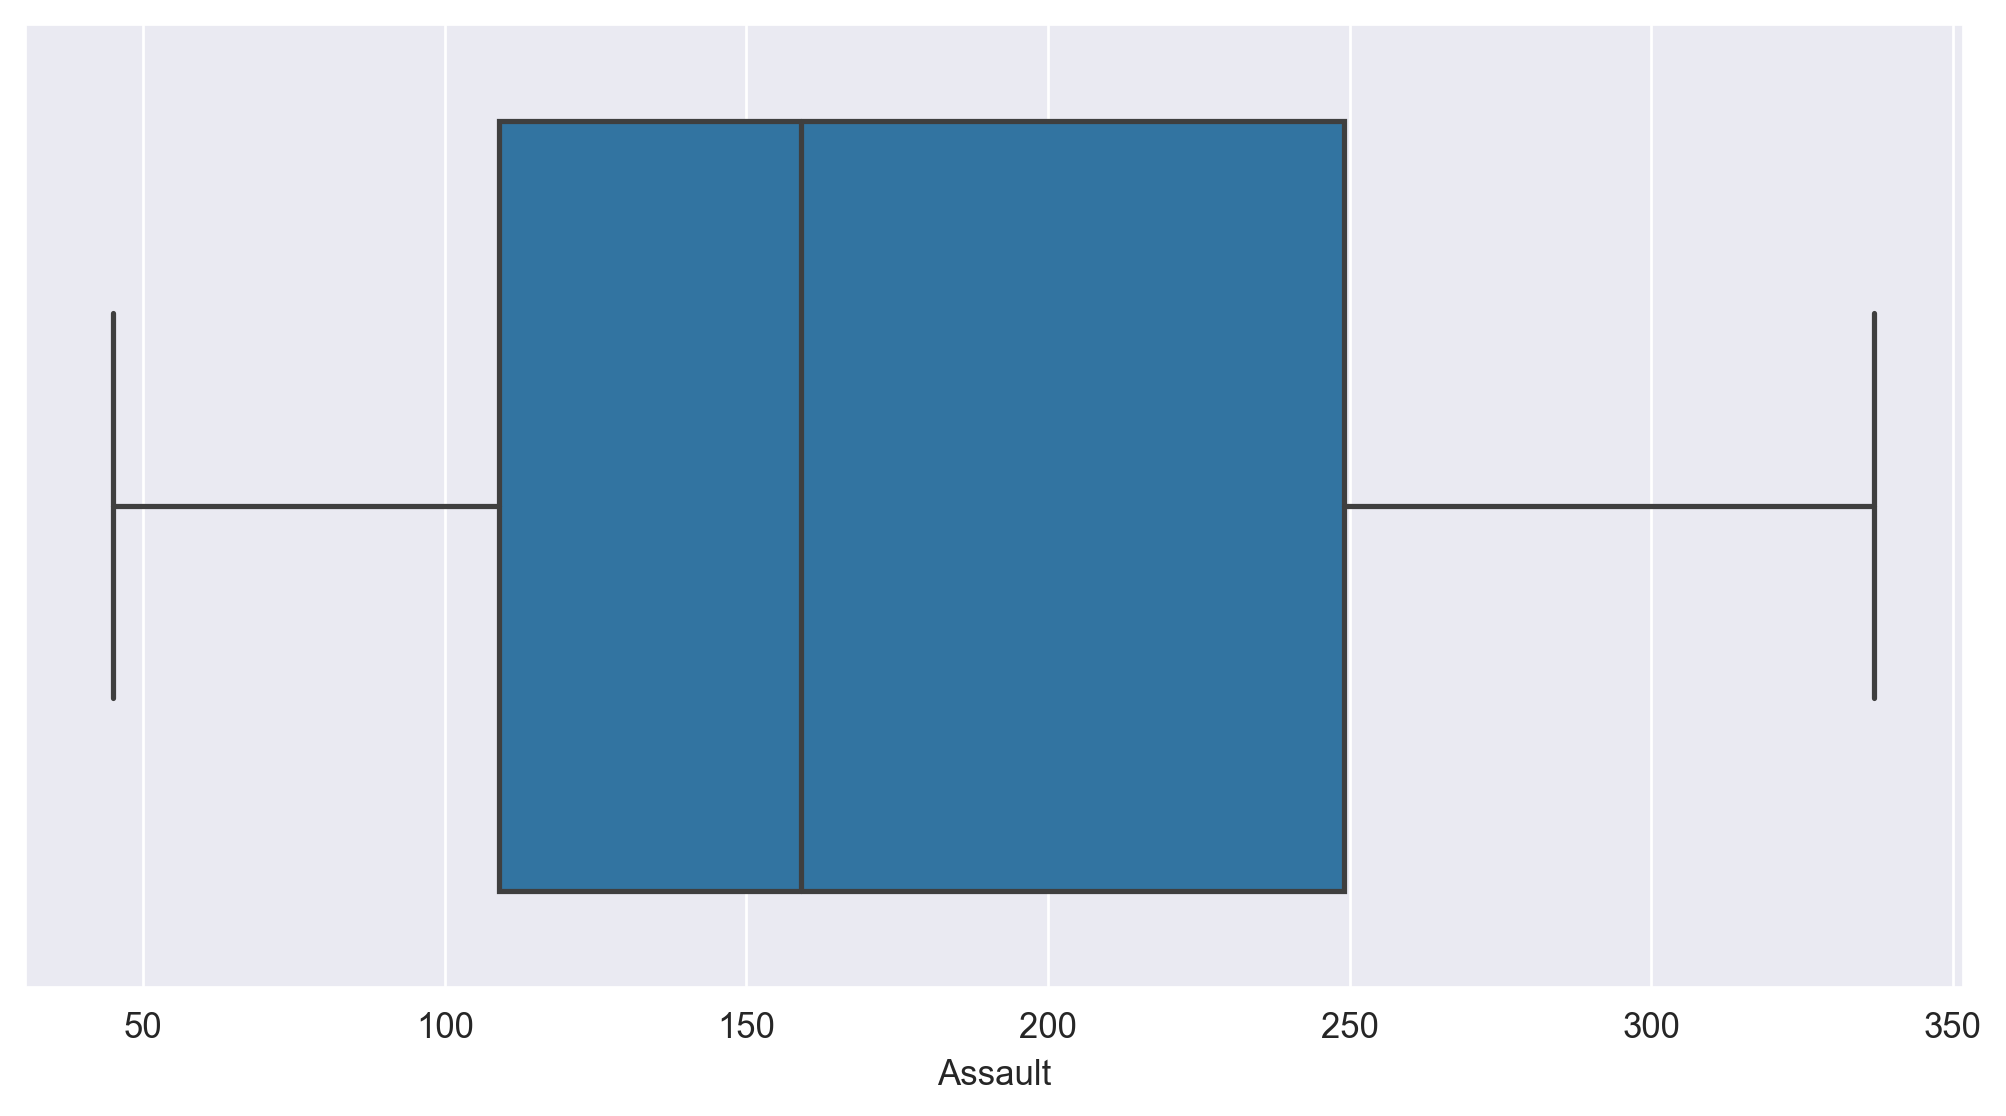

In [11]:
sns.boxplot(x=df['Assault'])

<Axes: xlabel='UrbanPop'>

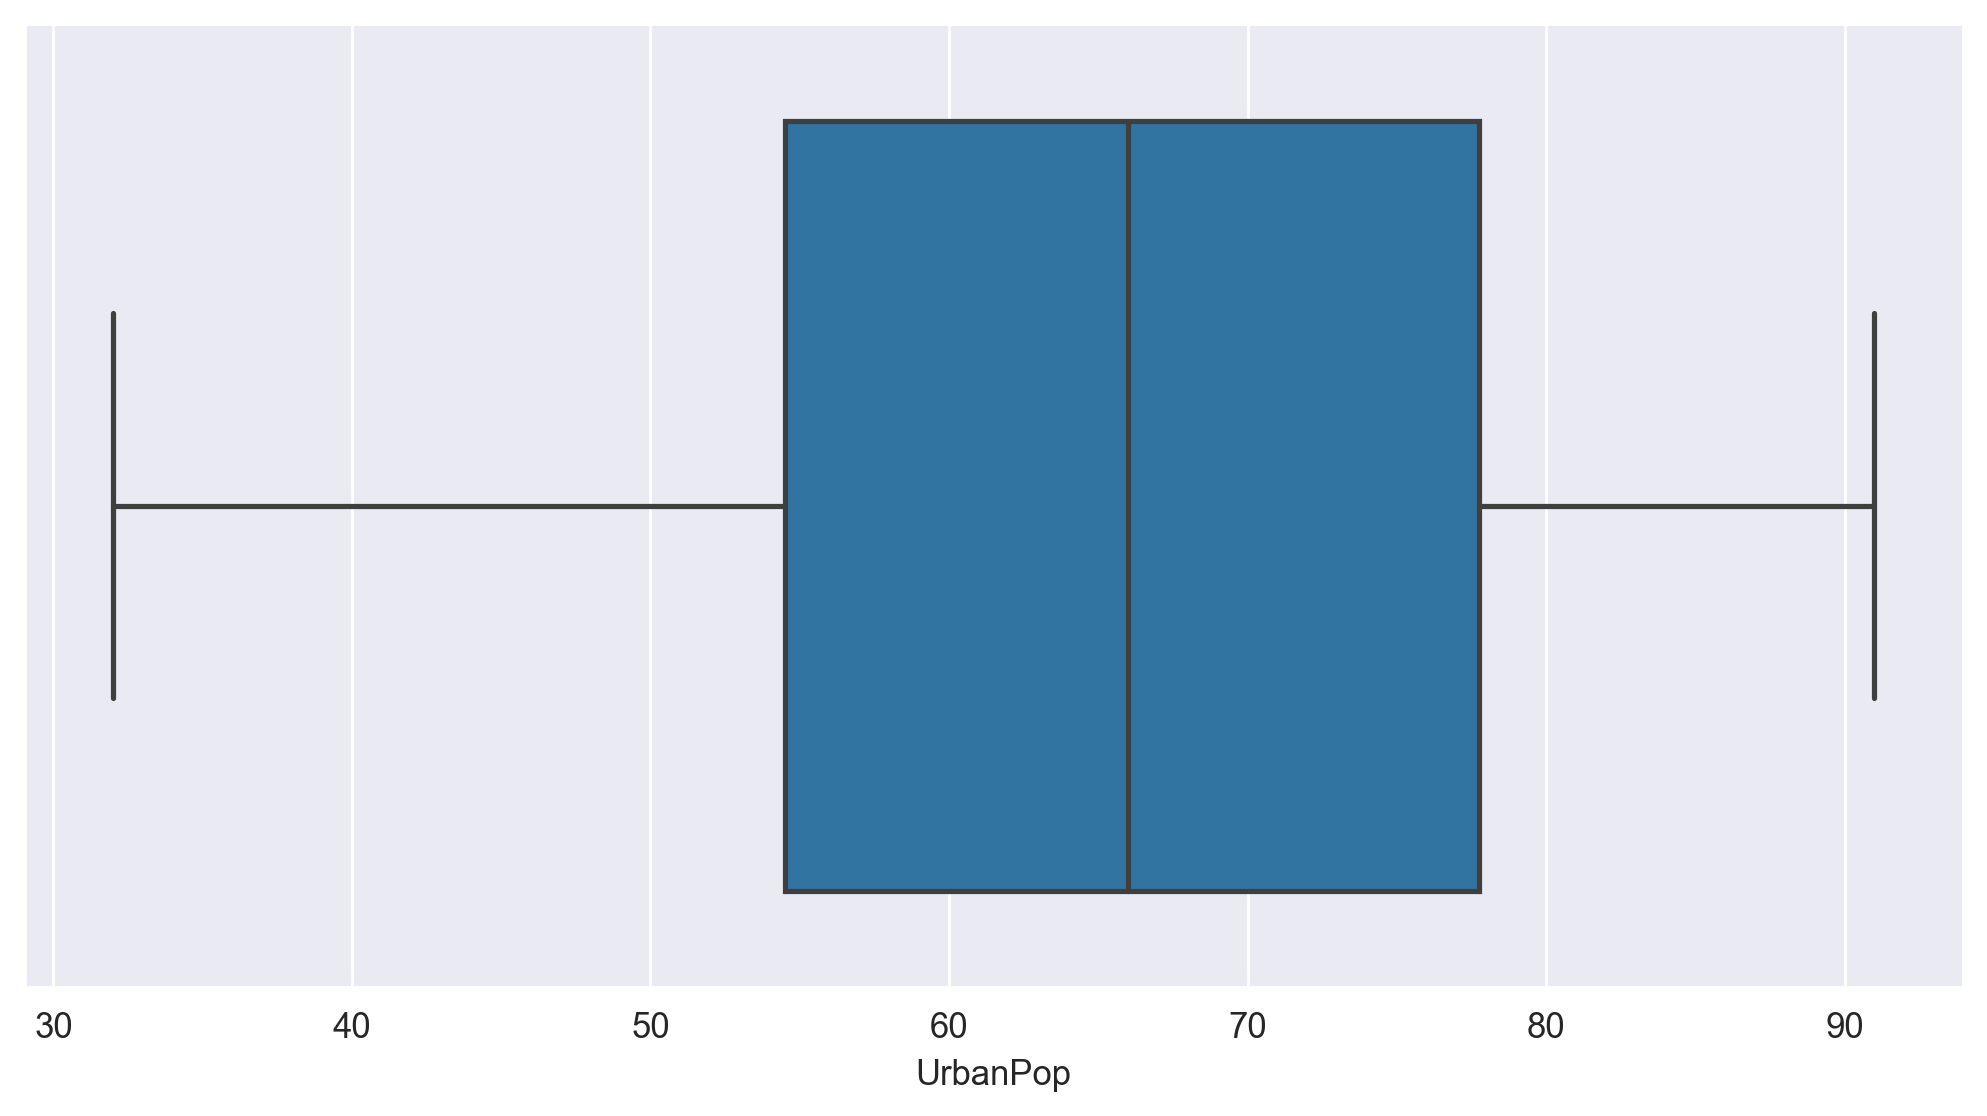

In [12]:
sns.boxplot(x=df['UrbanPop'])

<Axes: xlabel='Rape'>

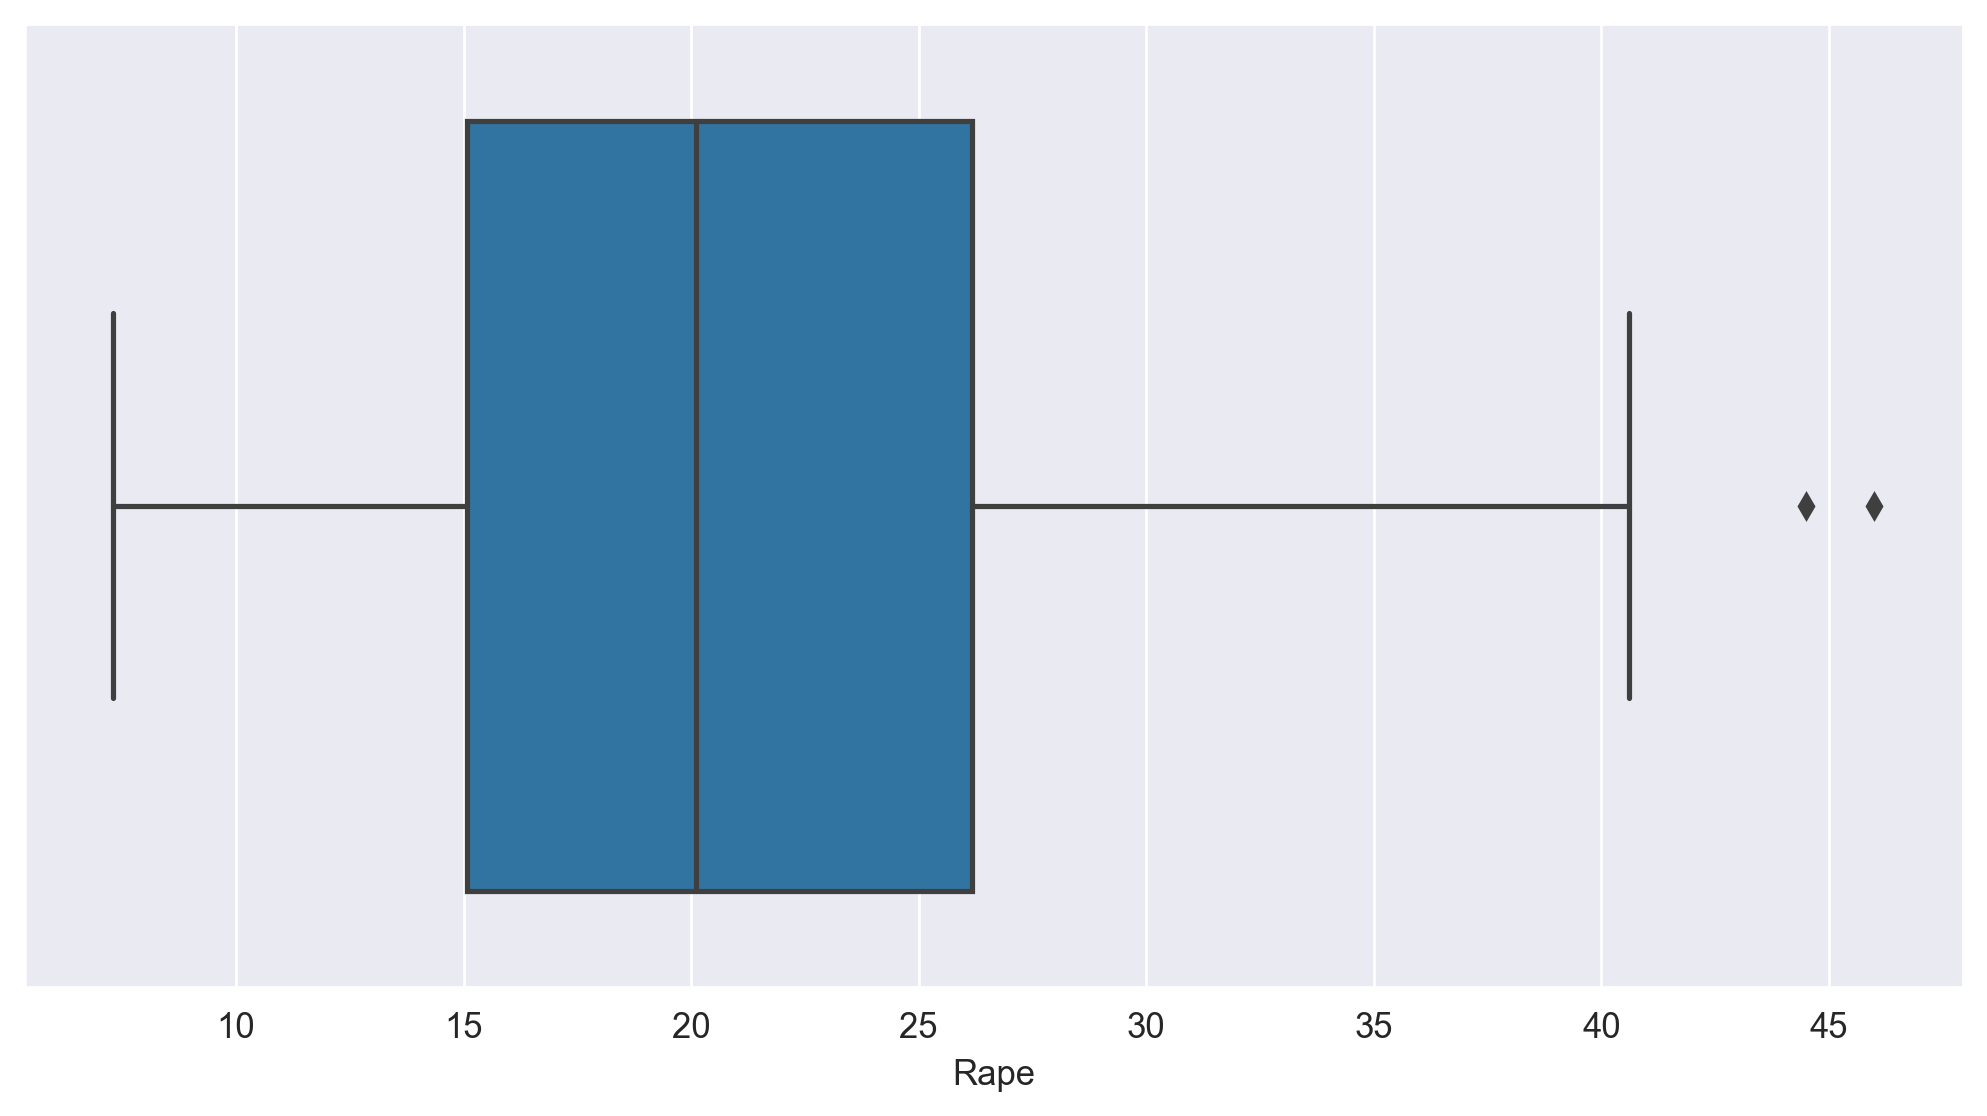

In [13]:
sns.boxplot(x=df['Rape'])

In [14]:
#There are outliers in column Rape
#Replacing the outiler with capping method

In [15]:
def outlier_detection (data,colname):
    q1=data[colname].quantile(0.25)
    q3=data[colname].quantile(0.75)
    iqr=q3-q1
    upper =q3+(1.5*iqr)
    lower = q1 - (1.5*iqr)
    return lower,upper

In [16]:
outlier_detection (df,'Rape')

(-1.5750000000000028, 42.825)

In [17]:
df.loc[df['Rape']>42.825,'Rape']=42.825
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.200
1,10.0,263,48,42.825
2,8.1,294,80,31.000
3,8.8,190,50,19.500
4,9.0,276,91,40.600
5,7.9,204,78,38.700
6,3.3,110,77,11.100
7,5.9,238,72,15.800
8,15.4,335,80,31.900
9,17.4,211,60,25.800


# Model Building

In [19]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514,  0.00719922],
       [ 0.51301858,  1.11805959, -1.22406668,  2.40232482],
       [ 0.07236067,  1.49381682,  1.00912225,  1.0926203 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18108811],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.15588993],
       [ 0.02597562,  0.40290872,  0.86954794,  1.94545115],
       [-1.04088037, -0.73648418,  0.79976079, -1.11144904],
       [-0.43787481,  0.81502956,  0.45082502, -0.59088995],
       [ 1.76541475,  1.99078607,  1.00912225,  1.19230183],
       [ 2.22926518,  0.48775713, -0.38662083,  0.51668259],
       [-0.57702994, -1.51224105,  1.21848371, -0.10355803],
       [-1.20322802, -0.61527217, -0.80534376, -0.76810155],
       [ 0.60578867,  0.94836277,  1.21848371,  0.31731953],
       [-0.13637203, -0.70012057, -0.03768506, -0.01495223],
       [-1.29599811, -1.39102904, -0.5959823 , -1.08929758],
       [-0.41468229, -0.67587817,  0.03210209, -0.34722399],
       [ 0.44344101, -0.

In [20]:
db = DBSCAN(eps=0.5, min_samples=3)

y = db.fit_predict(x)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

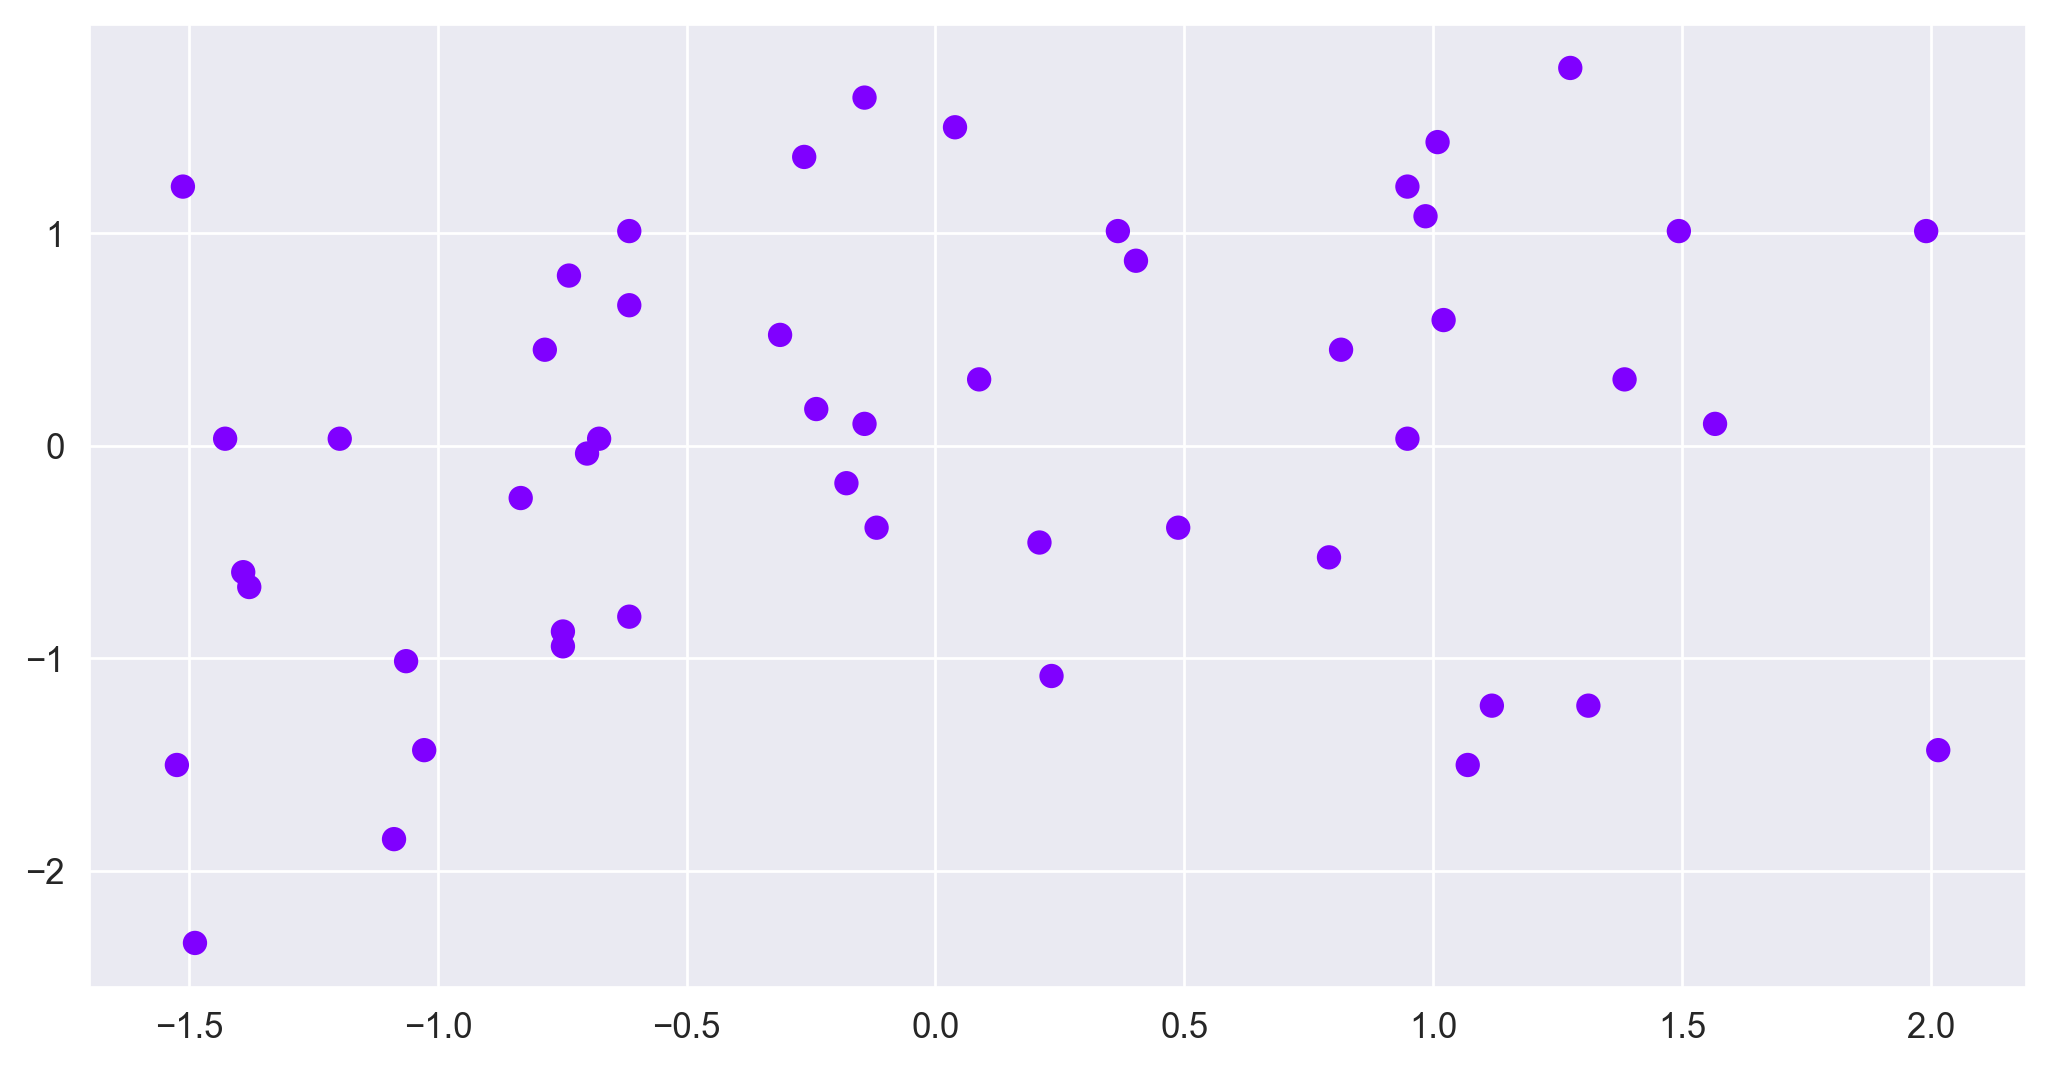

In [21]:
plt.scatter(x[:,1],x[:,2],c = y,cmap = 'rainbow')

In [ ]:
#silhouette_score is less so need to increase model performance, use hyperprameter tunning 

In [24]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)

In [25]:
neigh.kneighbors(x) #itgiven in first arrat avg distance of three point and 
#in second array poins in each three circled point

(array([[0.        , 0.78046991, 0.86136076],
        [0.        , 1.98614609, 2.06662813],
        [0.        , 1.04858682, 1.0904334 ],
        [0.        , 1.00614523, 1.00768103],
        [0.        , 1.08774321, 1.30157319],
        [0.        , 1.25215729, 1.2592227 ],
        [0.        , 0.88619898, 0.96537857],
        [0.        , 1.1969702 , 1.27141067],
        [0.        , 1.30975305, 1.35167331],
        [0.        , 0.87271197, 1.02287801],
        [0.        , 1.08398519, 1.16149512],
        [0.        , 0.76134318, 0.81598642],
        [0.        , 0.35771537, 0.833361  ],
        [0.        , 0.43968064, 0.53630318],
        [0.        , 0.21283959, 0.63834582],
        [0.        , 0.43968064, 0.52756676],
        [0.        , 0.86102759, 1.07360669],
        [0.        , 0.78046991, 0.87271197],
        [0.        , 0.50648651, 0.65821489],
        [0.        , 0.55158668, 1.10648308],
        [0.        , 0.80832534, 0.92581496],
        [0.        , 0.58899609, 0

In [27]:
d,index = neigh.kneighbors(x)
d

array([[0.        , 0.78046991, 0.86136076],
       [0.        , 1.98614609, 2.06662813],
       [0.        , 1.04858682, 1.0904334 ],
       [0.        , 1.00614523, 1.00768103],
       [0.        , 1.08774321, 1.30157319],
       [0.        , 1.25215729, 1.2592227 ],
       [0.        , 0.88619898, 0.96537857],
       [0.        , 1.1969702 , 1.27141067],
       [0.        , 1.30975305, 1.35167331],
       [0.        , 0.87271197, 1.02287801],
       [0.        , 1.08398519, 1.16149512],
       [0.        , 0.76134318, 0.81598642],
       [0.        , 0.35771537, 0.833361  ],
       [0.        , 0.43968064, 0.53630318],
       [0.        , 0.21283959, 0.63834582],
       [0.        , 0.43968064, 0.52756676],
       [0.        , 0.86102759, 1.07360669],
       [0.        , 0.78046991, 0.87271197],
       [0.        , 0.50648651, 0.65821489],
       [0.        , 0.55158668, 1.10648308],
       [0.        , 0.80832534, 0.92581496],
       [0.        , 0.58899609, 0.98618116],
       [0.

In [28]:
distance = np.sort(d[:,1])
distance

array([0.21283959, 0.21283959, 0.35771537, 0.35771537, 0.43968064,
       0.43968064, 0.50648651, 0.50969441, 0.50969441, 0.52756676,
       0.5346085 , 0.55158668, 0.55158668, 0.55673892, 0.57063085,
       0.58899609, 0.60463438, 0.60463438, 0.65592378, 0.70603394,
       0.7225133 , 0.72350134, 0.72350134, 0.73808561, 0.74650051,
       0.76134318, 0.78046991, 0.78046991, 0.80613591, 0.80613591,
       0.80832534, 0.80832534, 0.833361  , 0.86102759, 0.86136076,
       0.87271197, 0.88619898, 0.97478014, 0.98618116, 0.99732068,
       1.00614523, 1.0065926 , 1.04858682, 1.07050139, 1.08398519,
       1.08774321, 1.1969702 , 1.25215729, 1.30975305, 1.98614609])

Text(0.5, 1.0, 'K-Distance Graph')

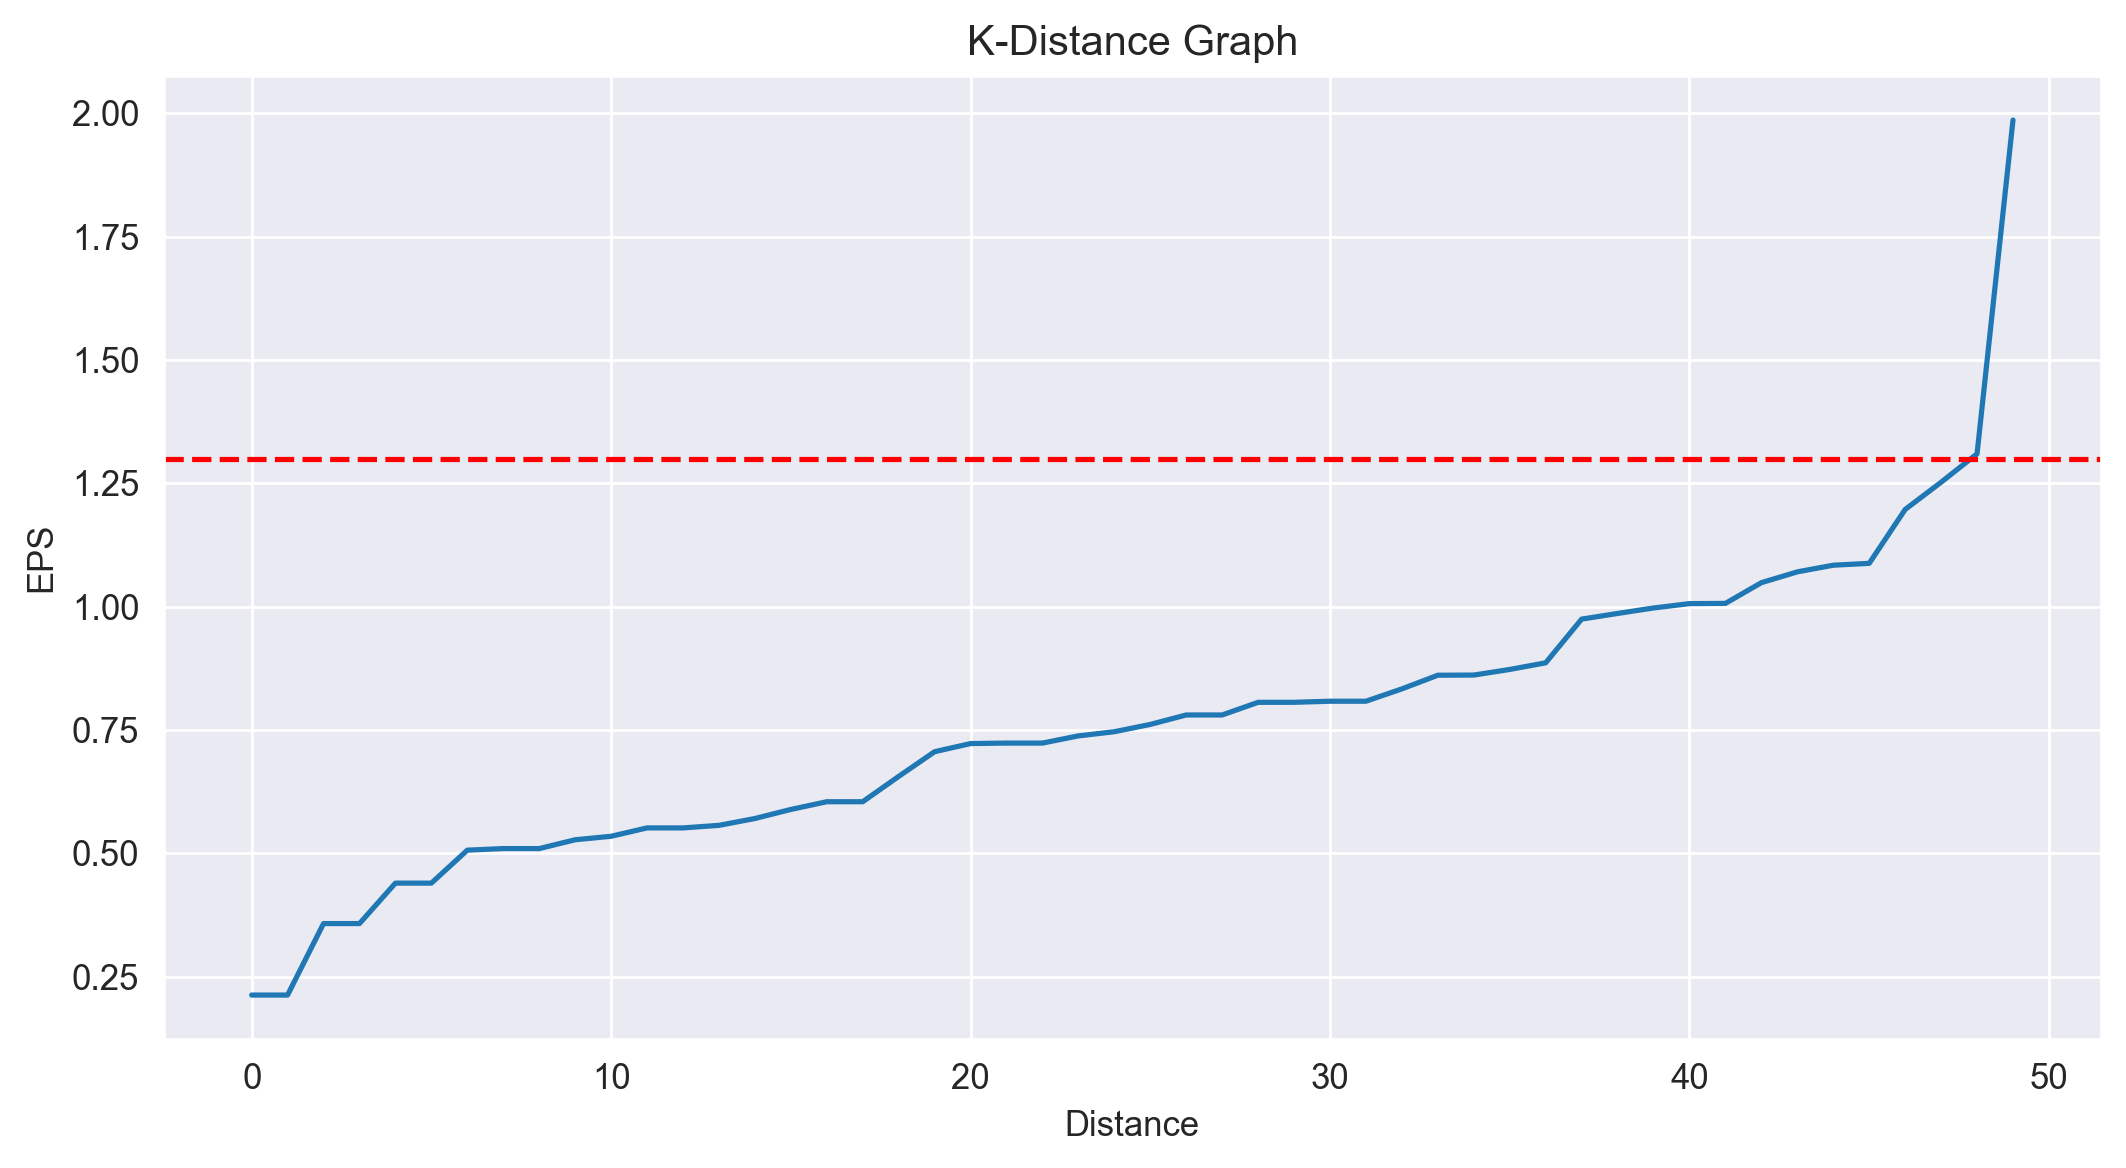

In [30]:
plt.plot(distance)
plt.axhline(y=1.30, linestyle = '--', color = 'red')
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [41]:
db = DBSCAN(eps=1.25,min_samples=7)
yp = db.fit_predict(x)
yp

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

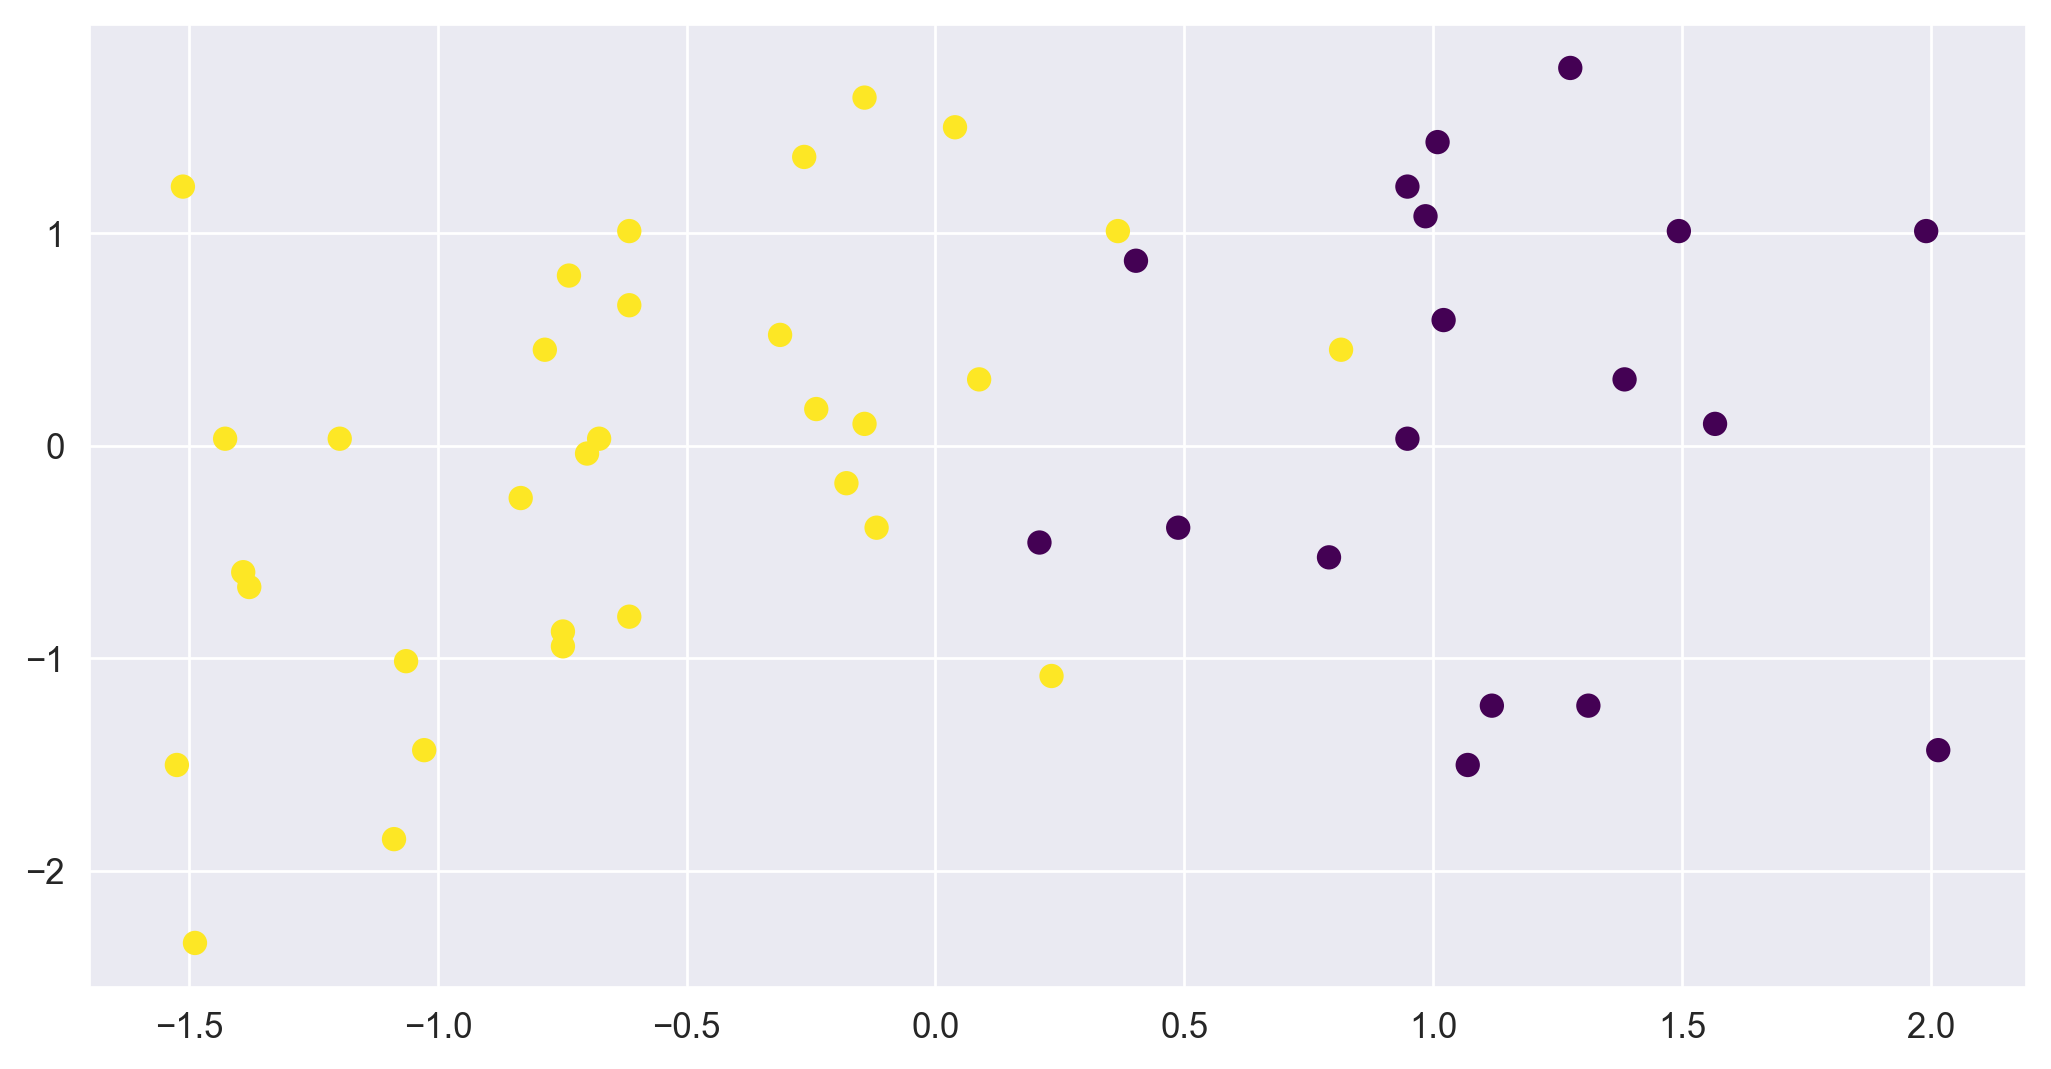

In [42]:
plt.scatter(x[:,1],x[:,2],c = yp, cmap='viridis')

In [43]:
silhouette_score(x,yp)

0.3863774336205521

In [ ]:
#to get silhouette_score near 1 we need large dataset here dataset is small so we can not further increase the silhouette score

In [ ]:
#Analyze the clusters

In [44]:
df['Cluster'] = yp
df

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.200,-1
1,10.0,263,48,42.825,-1
2,8.1,294,80,31.000,-1
3,8.8,190,50,19.500,0
4,9.0,276,91,40.600,-1
5,7.9,204,78,38.700,-1
6,3.3,110,77,11.100,0
7,5.9,238,72,15.800,0
8,15.4,335,80,31.900,-1
9,17.4,211,60,25.800,-1


In [45]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
-1,12.311111,262.555556,67.666667,29.152778
0,5.243750,119.125000,64.343750,16.625000
